In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, pacf, acf
from statsmodels.tsa.arima_model import ARIMA
import math
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('AirPassengers.csv')

In [26]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [28]:
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]), 15))

In [29]:
data['Month']

0     1949-01-15
1     1949-02-15
2     1949-03-15
3     1949-04-15
4     1949-05-15
5     1949-06-15
6     1949-07-15
7     1949-08-15
8     1949-09-15
9     1949-10-15
10    1949-11-15
11    1949-12-15
12    1950-01-15
13    1950-02-15
14    1950-03-15
15    1950-04-15
16    1950-05-15
17    1950-06-15
18    1950-07-15
19    1950-08-15
20    1950-09-15
21    1950-10-15
22    1950-11-15
23    1950-12-15
24    1951-01-15
25    1951-02-15
26    1951-03-15
27    1951-04-15
28    1951-05-15
29    1951-06-15
         ...    
114   1958-07-15
115   1958-08-15
116   1958-09-15
117   1958-10-15
118   1958-11-15
119   1958-12-15
120   1959-01-15
121   1959-02-15
122   1959-03-15
123   1959-04-15
124   1959-05-15
125   1959-06-15
126   1959-07-15
127   1959-08-15
128   1959-09-15
129   1959-10-15
130   1959-11-15
131   1959-12-15
132   1960-01-15
133   1960-02-15
134   1960-03-15
135   1960-04-15
136   1960-05-15
137   1960-06-15
138   1960-07-15
139   1960-08-15
140   1960-09-15
141   1960-10-

In [30]:
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [31]:
ts = data['#Passengers']

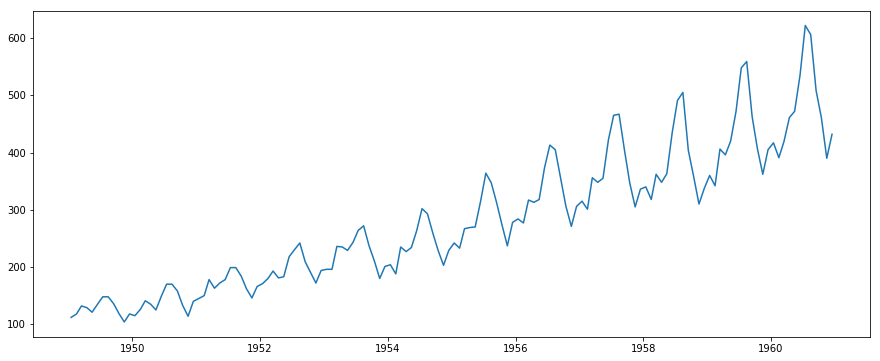

In [32]:
plt.plot(ts)

In [33]:
ts_log = np.log(ts)

In [34]:
def test_stationarity(timeseries):
    rolemean = timeseries.rolling(window=52, center=False).mean()
    rolestd = timeseries.rolling(window=52, center=False).std()
    orig = plt.plot(timeseries, color='blue' ,label='Original')
    mean = plt.plot(rolemean, color='green', label='Rolemean')
    std = plt.plot(rolestd, color='red', label='Rolestd')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print('Result of Dicky_fuller Test')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Stats', 'P-Value', 'Lags Used', 'No. of OBs Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

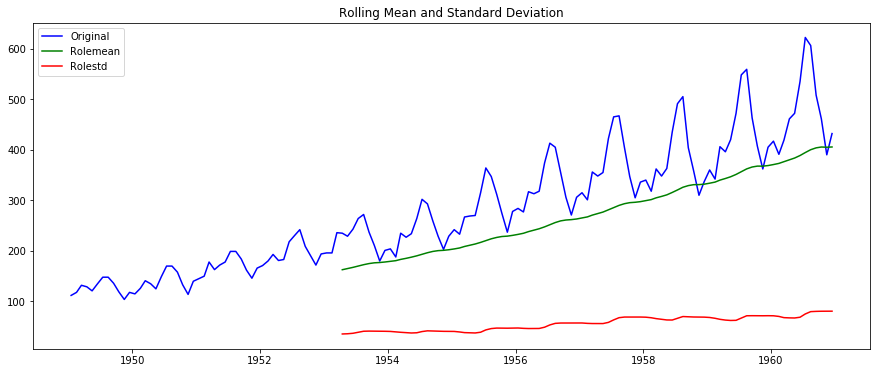

Result of Dicky_fuller Test
Test Stats                0.815369
P-Value                   0.991880
Lags Used                13.000000
No. of OBs Used         130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [35]:
test_stationarity(data['#Passengers'])

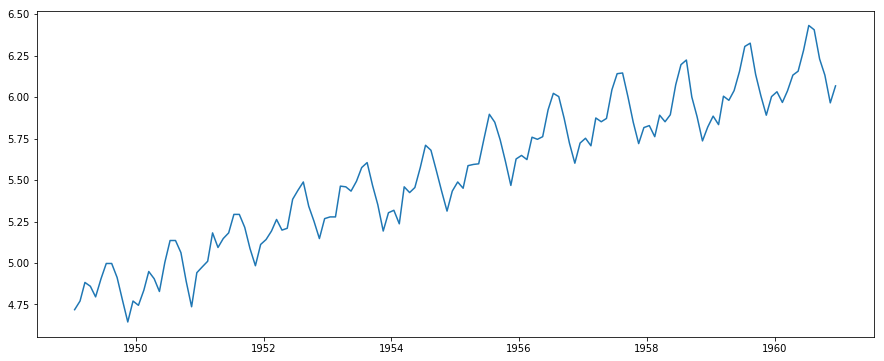

In [36]:
plt.plot(ts_log)

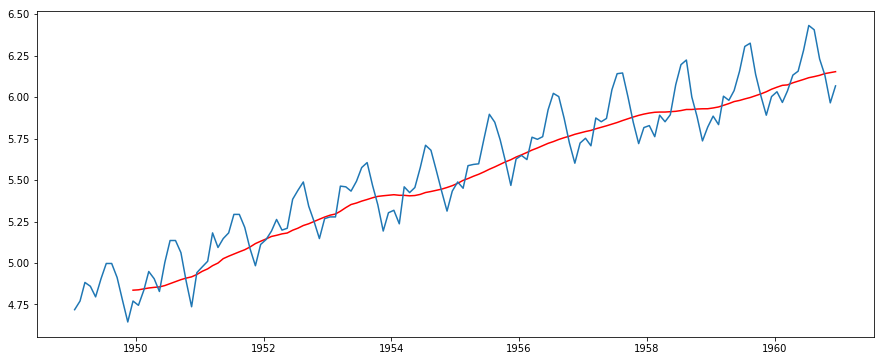

In [37]:
MovingAverage = ts_log.rolling(window=12).mean()
MovingSTD = ts_log.rolling(window=12).std()
plt.plot(MovingAverage, color='red')
plt.plot(ts_log)

In [38]:
ts_diff= ts_log-MovingAverage
ts_diff.head(10)
ts_diff.dropna(inplace=True)
ts_diff.head(12)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
1950-10-15   -0.018578
1950-11-15   -0.180379
Name: #Passengers, dtype: float64

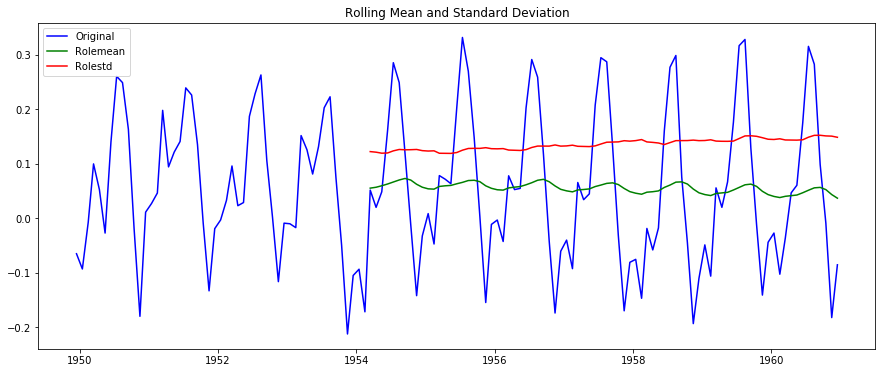

Result of Dicky_fuller Test
Test Stats               -3.162908
P-Value                   0.022235
Lags Used                13.000000
No. of OBs Used         119.000000
Critical value (1%)      -3.486535
Critical value (5%)      -2.886151
Critical value (10%)     -2.579896
dtype: float64


In [39]:
test_stationarity(ts_diff)

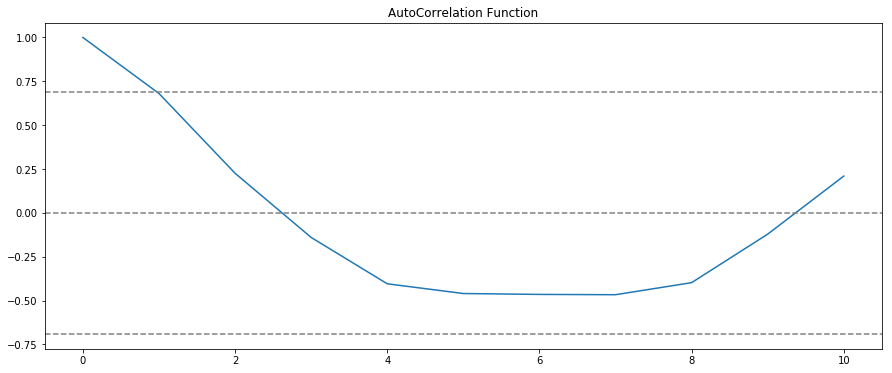

In [42]:
plt.plot(np.arange(0,11),acf(ts_diff,nlags=10))
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_diff)), linestyle='--', color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_diff)), linestyle='--', color='grey')
plt.title('AutoCorrelation Function')
plt.show()

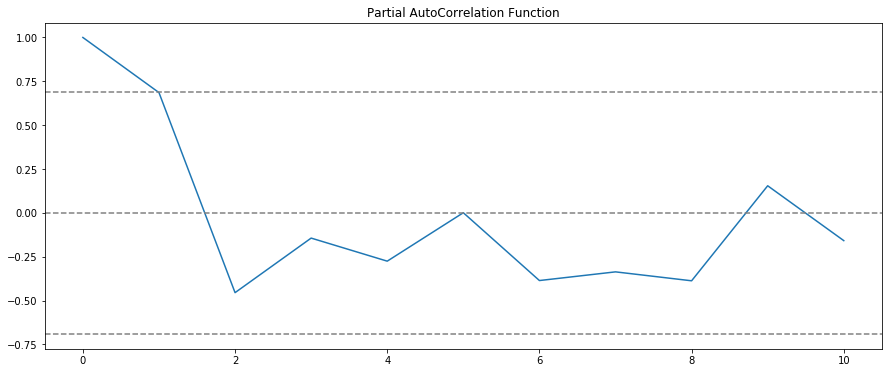

In [43]:
plt.plot(np.arange(0,11),pacf(ts_diff,nlags=10))
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_diff)), linestyle='--', color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_diff)), linestyle='--', color='grey')
plt.title('Partial AutoCorrelation Function')
plt.show()

Text(0.5, 1.0, 'RSS: nan')

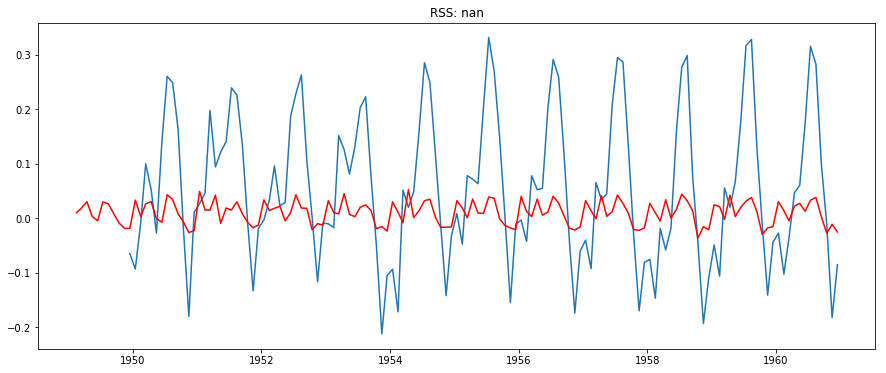

In [44]:
model = ARIMA(ts_log,order=(1,1,0))
results_ARIMA = model.fit(disp=1)
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues[1:]-ts_diff)**2))

In [45]:
predict_arima_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predict_arima_diff.head()

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
dtype: float64

In [47]:
predict_arima_diff_cumsum = predict_arima_diff.cumsum()
predict_arima_diff_cumsum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

In [48]:
predict_arima_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predict_arima_log = predict_arima_log.add(predict_arima_diff_cumsum, fill_value=0)
predict_arima_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

Text(0.5, 1.0, 'RMSE: 52.1841')

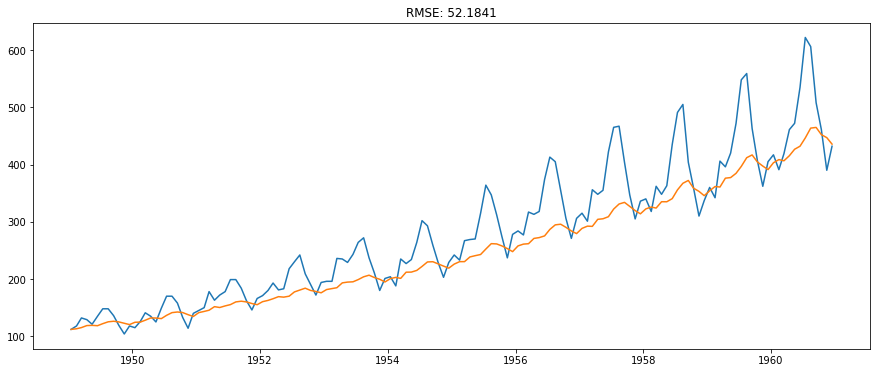

In [49]:
pred_arima = np.exp(predict_arima_log)
plt.plot(ts)
plt.plot(pred_arima)
plt.title('RMSE: %.4f'%np.sqrt(sum((pred_arima-ts)**2)/len(ts)))